# <span style="color: tomato;">            Paint Black & White Photos</span>
by: Mika Yosef

<img src="mountain.jpg"/> <img src="mountain_pred.jpg"/>

<!-- ![](test.jpg) -->
<!-- ![](colorfig2.jpg) -->

<!-- <img src="first_test.jpg"/> -->

This project allows you to bring the image back to life.

by using the dataset CIFAR10 (data that include 50K different pictures of variance objects: cats, deers, airplains, trucks etc.), I built a model, based on Neural Network.
the model goal is to success to take a black & white picture and make it colorful.




In [1]:
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

In [2]:
from BW_dataset import BWDataset
from net import CONVNet
from net import FULLNet 
from train_val import train
from preview import imshow_to_numpy
from test_and_save import test_paint
from preview import preview
from preview import imshow_to_numpy
torch.backends.cudnn.benchmark = True


# Main Definitions

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64


trainset = BWDataset(train=True, download=True,device=device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

valset = BWDataset(train=False, download=True,device=device)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)

PATH = './data/convXXX_20epoch.ckpt'

Files already downloaded and verified
Files already downloaded and verified


In [5]:
NET = CONVNet().to(device)


criterion = nn.L1Loss().to(device)
optimizer = optim.Adam(NET.parameters(), lr=0.0001)

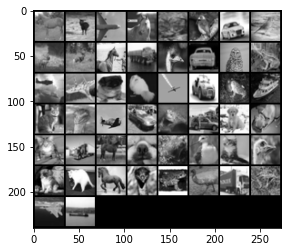

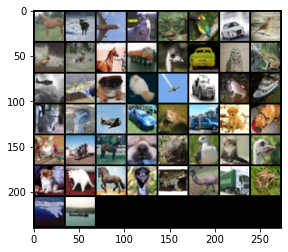

In [6]:
preview(trainloader)

# Train a Model

In [6]:
train_set_loss, val_set_loss, number_of_epochs = train(100,trainloader,valloader,optimizer,criterion, NET, PATH)

Val Loss: 0.047684: 100%|██████████| 100/100 [3:39:54<00:00, 131.95s/it] 

Finished Training


the model: CNN for 100 epochs, with batch size of 64.

In [ ]:
torch.save(NET.state_dict(), PATH) 

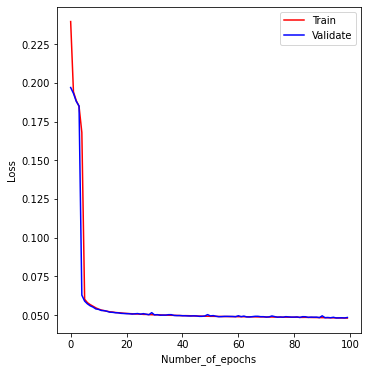

In [ ]:

plt.figure( figsize=(12,6))

plt.subplot(121)
plt.plot(number_of_epochs,train_set_loss,'r',label = 'Train')
plt.plot(number_of_epochs,val_set_loss,'b',label = 'Validate')
plt.xlabel('Number_of_epochs'); plt.ylabel('Loss');
plt.legend()

plt.show()

This graph shows that the loss of the validation improve as the number of epochs increase. but this is a small improvement (almost stable) so I did not run any more epochs.

# Checking the validation results:
The model shows a loss of 0.45. To make sure, I want to check it on one random colorful image from the validation data, and compare it to the painting prdicted image:

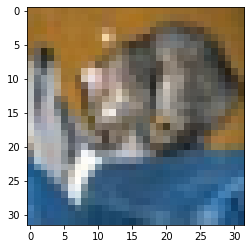

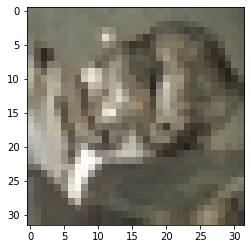

validation loss of the picture: 0.04968620464205742


In [ ]:
val_loss = 0
with torch.no_grad():
    for idx, data in enumerate(valloader):
        gray, color = data
        outputs = NET(gray)
        loss = criterion(outputs, color)
        val_loss += loss.item()


        imshow_to_numpy(color[0])
        plt.figure()
        imshow_to_numpy(outputs[0])
        break
    print(f"validation loss of the picture: {val_loss}")

## Reload the Model

I used the model I've already trained to check it ability to paint an image that wasn't included in the dataset.


To be able to evaluate better the results, I tryed a variance of picture to find the strength and weakness of the model.


below you can see some of the original gray picture and the new colorful picture by the model: 

In [5]:
NET.load_state_dict(torch.load(PATH))
NET.eval()

RuntimeError: Error(s) in loading state_dict for CONVNet:
	size mismatch for conv1.weight: copying a param with shape torch.Size([3, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([12, 1, 3, 3]).
	size mismatch for conv1.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([12]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([6, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([25, 12, 3, 3]).
	size mismatch for conv2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([25]).
	size mismatch for conv3.weight: copying a param with shape torch.Size([10, 6, 3, 3]) from checkpoint, the shape in current model is torch.Size([40, 25, 3, 3]).
	size mismatch for conv3.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([40]).
	size mismatch for conv4.weight: copying a param with shape torch.Size([20, 10, 3, 3]) from checkpoint, the shape in current model is torch.Size([55, 40, 3, 3]).
	size mismatch for conv4.bias: copying a param with shape torch.Size([20]) from checkpoint, the shape in current model is torch.Size([55]).
	size mismatch for conv5.weight: copying a param with shape torch.Size([30, 20, 3, 3]) from checkpoint, the shape in current model is torch.Size([70, 55, 3, 3]).
	size mismatch for conv5.bias: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([70]).
	size mismatch for conv6.weight: copying a param with shape torch.Size([40, 30, 3, 3]) from checkpoint, the shape in current model is torch.Size([60, 70, 3, 3]).
	size mismatch for conv6.bias: copying a param with shape torch.Size([40]) from checkpoint, the shape in current model is torch.Size([60]).
	size mismatch for conv7.weight: copying a param with shape torch.Size([50, 40, 3, 3]) from checkpoint, the shape in current model is torch.Size([40, 60, 3, 3]).
	size mismatch for conv7.bias: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([40]).
	size mismatch for conv8.weight: copying a param with shape torch.Size([35, 50, 3, 3]) from checkpoint, the shape in current model is torch.Size([20, 40, 3, 3]).
	size mismatch for conv8.bias: copying a param with shape torch.Size([35]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for conv9.weight: copying a param with shape torch.Size([25, 35, 3, 3]) from checkpoint, the shape in current model is torch.Size([10, 20, 3, 3]).
	size mismatch for conv9.bias: copying a param with shape torch.Size([25]) from checkpoint, the shape in current model is torch.Size([10]).
	size mismatch for conv10.weight: copying a param with shape torch.Size([15, 25, 3, 3]) from checkpoint, the shape in current model is torch.Size([5, 10, 3, 3]).
	size mismatch for conv10.bias: copying a param with shape torch.Size([15]) from checkpoint, the shape in current model is torch.Size([5]).
	size mismatch for conv11.weight: copying a param with shape torch.Size([3, 15, 3, 3]) from checkpoint, the shape in current model is torch.Size([3, 5, 3, 3]).

In [ ]:
test_paint("mountain",device, NET)


NameError: name 'test_paint' is not defined

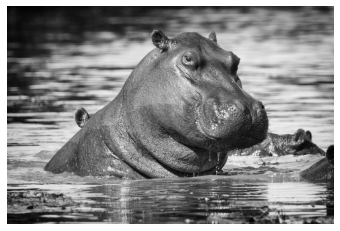

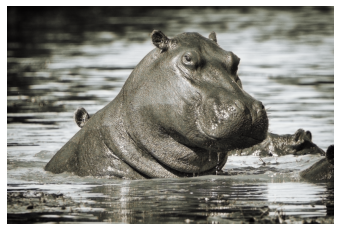

In [ ]:
test_paint("hippo",device, NET)

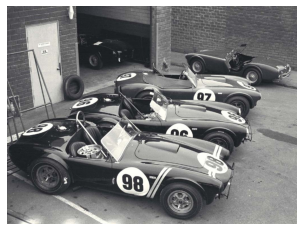

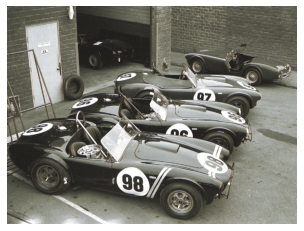

In [ ]:
test_paint("cars",device, NET)

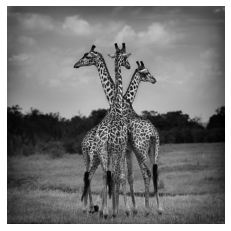

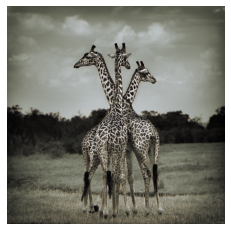

In [ ]:
test_paint("girraf",device, NET)

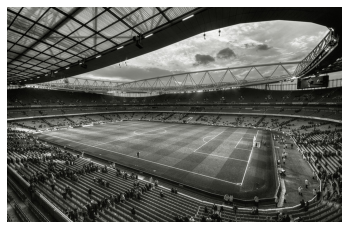

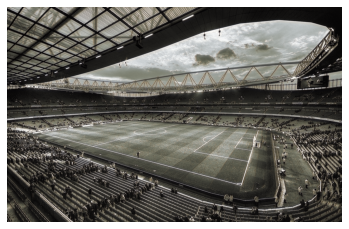

In [ ]:
test_paint("football",device, NET)

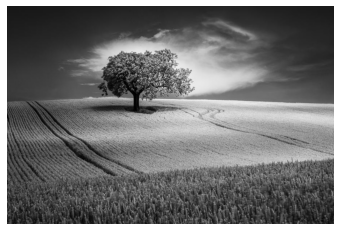

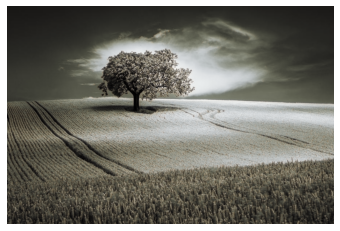

In [ ]:
test_paint("trees",device, NET)

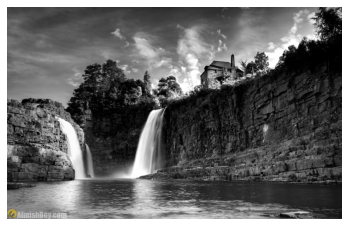

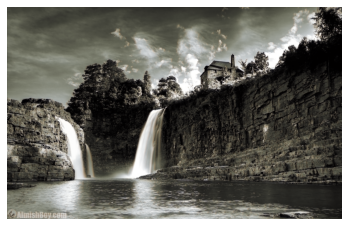

In [ ]:
test_paint("per",device, NET)